# MOSAIC Toy Examples

In [1]:
import sys, random
sys.path.insert(0, "../mosaic")
import mosaic

Setting corpus_size parameter to 1
adding primitive node:  go
adding primitive node:  he
adding phrase: ['he', 'go']
adding primitive node:  did
adding phrase: ['did', 'he', 'go']


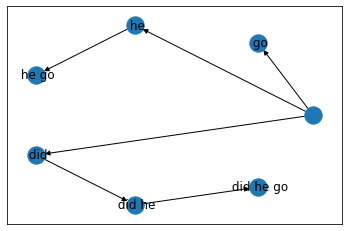

In [2]:
# Let's add "did he go" to the network five times
w = mosaic.WordNetwork(verbose=True)
w.params.calculate_ncp = False
for i in range(5):
    w.process_utterances([["did", "he", "go"]])
w.visualise()

adding primitive node:  walks
adding phrase: ['he', 'walks']
Number of nodes: 9
Number of generative links: 0
Number of utterances: 5
Mean utterance length: 1.8
Proportion of novel utterances: 0


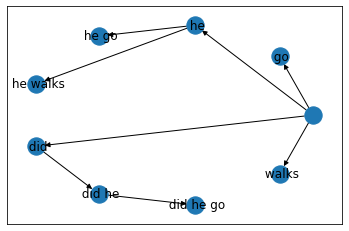

In [3]:
# Let's add "he walks" twice
w.process_utterances([["he", "walks"], ["he", "walks"]])
w.print_stats()
w.visualise()


Setting corpus_size parameter to 3
adding primitive node:  runs
adding primitive node:  she
adding primitive node:  sings
adding primitive node:  he
adding phrase: ['she', 'runs']
adding phrase: ['he', 'sings']
adding phrase: ['he', 'runs']
Number of nodes: 8
Number of generative links: 0
Number of utterances: 5
Mean utterance length: 1.6
Proportion of novel utterances: 0


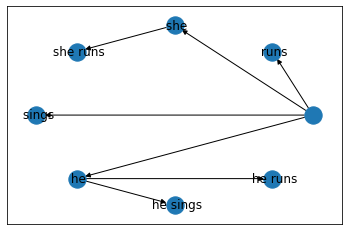

In [4]:
# Let's show some generative links
w = mosaic.WordNetwork(verbose=True)
w.params.calculate_ncp = False
for i in range(5):
    w.process_utterances([["he", "runs"],["she", "runs"], ["he", "sings"]])
w.visualise()
w.print_stats()

In [5]:
for n in w.root.get_all_nodes():
    print(n.phrase, [c.phrase for c in n.generative_links])

ROOT []
runs []
she []
runs []
sings []
he []
sings []
runs []


## Testing on Dominic CHILDES corpus

In [6]:
from dataset import DataSet
from params import Params

data = DataSet("../data/corpora/Manchester/Dominic_adult.txt")
data.strip_punctuation()
print("Number of utterances:", data.size)

Number of utterances: 38063


Running with node creation probability set to 1:

In [7]:
#network = mosaic.WordNetwork(verbose=False, calculate_ncp=False)
#network.process_utterances(data.utterances)
#network.print_stats()

Running with node creation probability calculated:

In [8]:
random.seed(0)
network = mosaic.WordNetwork()
for i in range(21):
    if i > 15:
        print("Iteration:",i)
    network.process_utterances(data.utterances)
    if i > 15:
        network.print_stats()
        print()


Iteration: 16
Number of nodes: 1099
Number of generative links: 45
Number of utterances: 933
Mean utterance length: 1.6
Proportion of novel utterances: 0.0247

Iteration: 17
Number of nodes: 2496
Number of generative links: 700
Number of utterances: 3620
Mean utterance length: 2.47
Proportion of novel utterances: 0.446

Iteration: 18
Number of nodes: 5710
Number of generative links: 1134
Number of utterances: 7693
Mean utterance length: 2.63
Proportion of novel utterances: 0.419

Iteration: 19
Number of nodes: 12493
Number of generative links: 20967
Number of utterances: 70239
Mean utterance length: 3.81
Proportion of novel utterances: 0.87

Iteration: 20
Number of nodes: 24590
Number of generative links: 302559
Number of utterances: 511160
Mean utterance length: 4.31
Proportion of novel utterances: 0.968

